<Figure size 1000x600 with 0 Axes>

<Axes: title={'center': 'NaN Values Before Transformation'}>

Text(0.5, 0, 'Columns')

Text(0, 0.5, 'NaN Count')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Model'),
  Text(1, 0, 'Selling Price'),
  Text(2, 0, 'Kilometers Driven'),
  Text(3, 0, 'Year'),
  Text(4, 0, 'Owner'),
  Text(5, 0, 'Fuel Type'),
  Text(6, 0, 'Transmission'),
  Text(7, 0, 'Insurance'),
  Text(8, 0, 'Car Condition')])

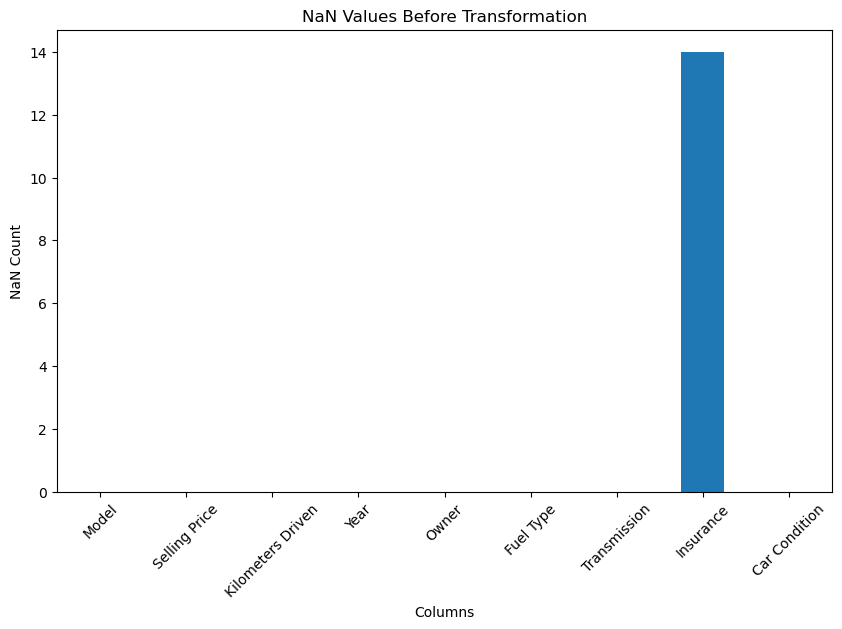

<Figure size 1000x600 with 0 Axes>

<Axes: title={'center': 'NaN Values After Filling'}>

Text(0.5, 0, 'Columns')

Text(0, 0.5, 'NaN Count')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Model'),
  Text(1, 0, 'Selling Price'),
  Text(2, 0, 'Kilometers Driven'),
  Text(3, 0, 'Year'),
  Text(4, 0, 'Owner'),
  Text(5, 0, 'Fuel Type'),
  Text(6, 0, 'Transmission'),
  Text(7, 0, 'Insurance'),
  Text(8, 0, 'Car Condition')])

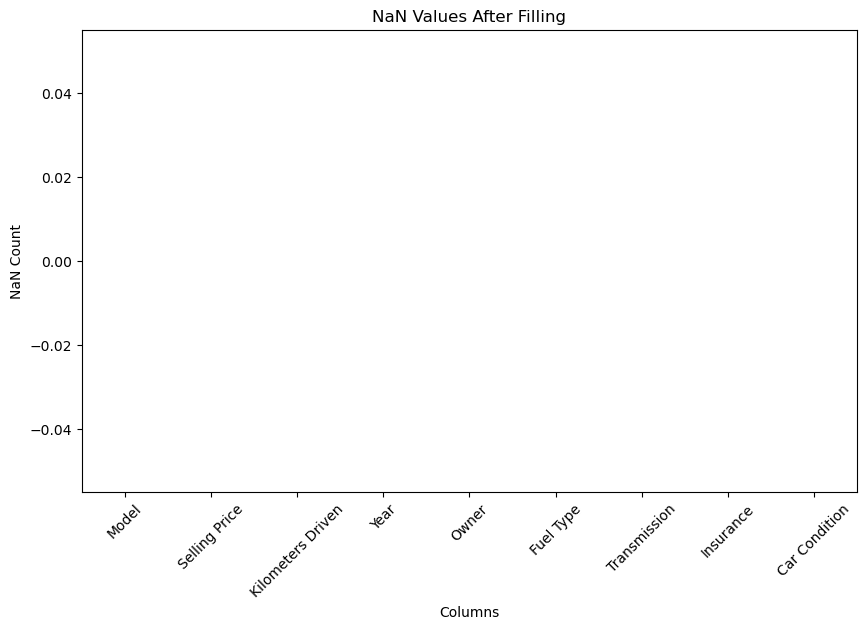

<Figure size 800x600 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Row Count Before and After Dropping NaN Values')

Text(0.5, 0, 'Dataframe State')

Text(0, 0.5, 'Row Count')

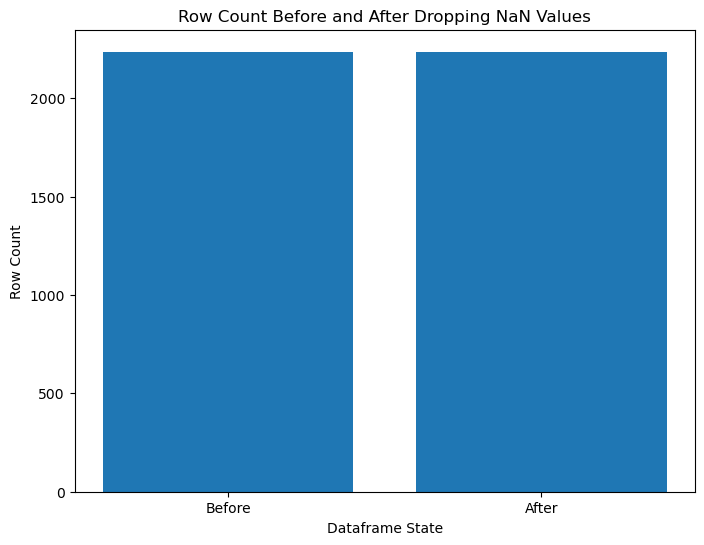

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Model Count Before and After Cleaning')

Text(0.5, 0, 'Data State')

Text(0, 0.5, 'Model Count')

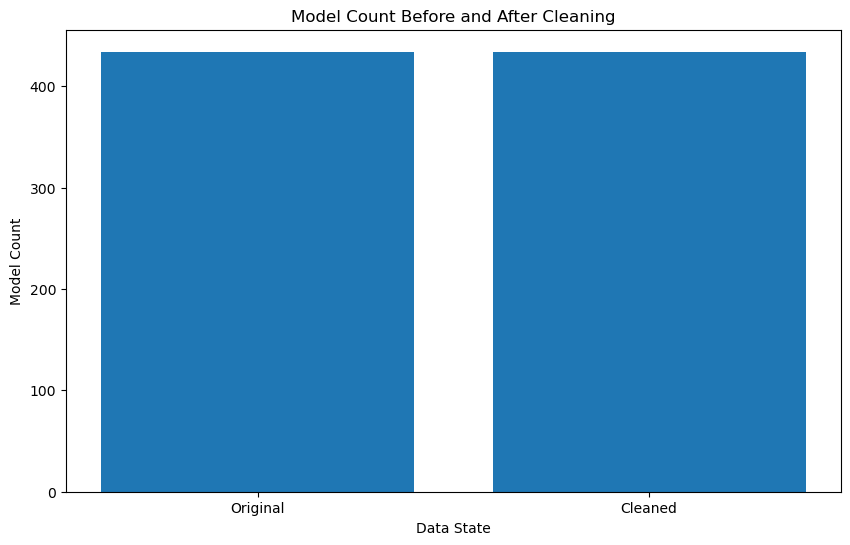

Data Types Before Optimization:
Model                 object
Selling Price          int64
Kilometers Driven      int64
Year                   int64
Owner                 object
Fuel Type             object
Transmission          object
Insurance             object
Car Condition        float64
dtype: object

Data Types After Optimization:
Model                 object
Selling Price        float32
Kilometers Driven      int64
Year                   int32
Owner                 object
Fuel Type             object
Transmission          object
Insurance             object
Car Condition        float64
dtype: object


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Chunk Number')

Text(0, 0.5, 'Time (s)')

Text(0.5, 1.0, 'Load and Operation Times for Chunks')

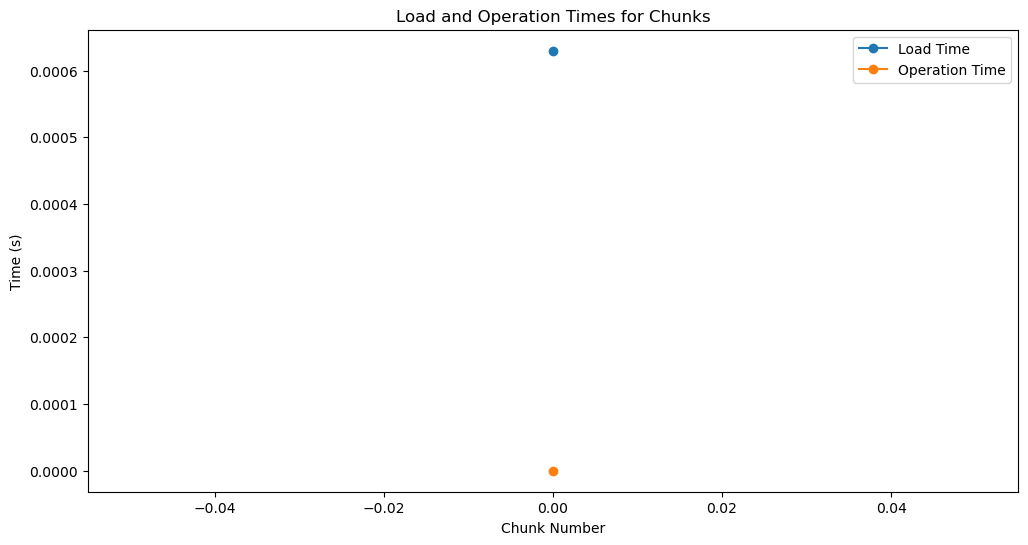

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Chunk Number')

Text(0, 0.5, 'Time (s)')

Text(0.5, 1.0, 'Load and Operation Times for Chunks (Selected Columns)')

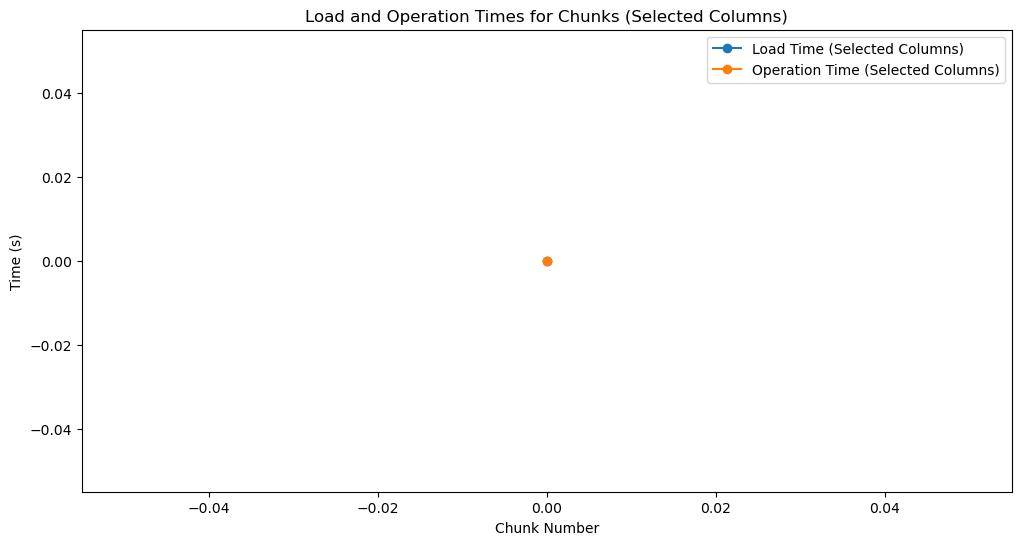

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Part 1: Common Data Problems

# Load the "Old car price" dataset
df = pd.read_csv("../Data/car_data.csv")

# Analyze NaN values
nan_count_before = df.isna().sum()

# Create a bar plot to compare NaN values before transformation
plt.figure(figsize=(10, 6))
nan_count_before.plot(kind='bar', title='NaN Values Before Transformation')
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.xticks(rotation=45)
plt.show()

# Fill NaN values with mean for numerical columns
df['Insurance'] = df['Insurance'].fillna('Expired')

# Create a bar plot to compare NaN values after filling
nan_count_after = df.isna().sum()
plt.figure(figsize=(10, 6))
nan_count_after.plot(kind='bar', title='NaN Values After Filling')
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.xticks(rotation=45)
plt.show()

# Drop rows with NaN values
df.dropna(subset=['Year'], inplace=True)

# Create a bar plot to compare row count before and after dropping NaN values
row_count_before = len(df)
row_count_after = len(df)
row_count_difference = row_count_before - row_count_after

plt.figure(figsize=(8, 6))
plt.bar(['Before', 'After'], [row_count_before, row_count_after])
plt.title('Row Count Before and After Dropping NaN Values')
plt.xlabel('Dataframe State')
plt.ylabel('Row Count')
plt.show()

# String operations to clean string columns
df['Model'] = df['Model'].str.lower().str.strip() # Convert model names to lowercase

# Create a bar plot to compare string values before and after cleaning
original_model = df['Model'].unique()
df['Model'] = df['Model'].str.capitalize()
cleaned_model = df['Model'].unique()

plt.figure(figsize=(10, 6))
plt.bar(['Original', 'Cleaned'], [len(original_model), len(cleaned_model)])
plt.title('Model Count Before and After Cleaning')
plt.xlabel('Data State')
plt.ylabel('Model Count')
plt.show()

# Part 2: Read in Chunks and Optimize

# Check the data types of columns
print("Data Types Before Optimization:")
print(df.dtypes)

# Change data types of columns
df['Year'] = df['Year'].astype('int32')
df['Selling Price'] = df['Selling Price'].astype('float32')

# Check the data types after optimization
print("\nData Types After Optimization:")
print(df.dtypes)

# Check performance speed with a plot
chunk_size = 10000
load_times = []
operation_times = []

for chunk in pd.read_csv('../Data/car_data.csv', chunksize=chunk_size):
    load_time = pd.Timestamp.now()
    chunk_filtered = chunk[chunk['Year'] > 2000]
    operation_time = pd.Timestamp.now()

    load_times.append((operation_time - load_time).total_seconds())
    operation_times.append((pd.Timestamp.now() - operation_time).total_seconds())

# Plot load times and operation times
plt.figure(figsize=(12, 6))
plt.plot(load_times, label='Load Time', marker='o')
plt.plot(operation_times, label='Operation Time', marker='o')
plt.xlabel('Chunk Number')
plt.ylabel('Time (s)')
plt.title('Load and Operation Times for Chunks')
plt.legend()
plt.show()

# Select columns you need only
selected_columns = ['Model', 'Year', 'Selling Price']

# Check performance speed with a plot
load_times_selected = []
operation_times_selected = []

for chunk in pd.read_csv('../Data/car_data.csv', usecols=selected_columns, chunksize=chunk_size):
    load_time = pd.Timestamp.now()
    chunk_filtered = chunk[chunk['Year'] > 2000]
    operation_time = pd.Timestamp.now()

    load_times_selected.append((operation_time - load_time).total_seconds())
    operation_times_selected.append((pd.Timestamp.now() - operation_time).total_seconds())

# Plot load times and operation times for selected columns
plt.figure(figsize=(12, 6))
plt.plot(load_times_selected, label='Load Time (Selected Columns)', marker='o')
plt.plot(operation_times_selected, label='Operation Time (Selected Columns)', marker='o')
plt.xlabel('Chunk Number')
plt.ylabel('Time (s)')
plt.title('Load and Operation Times for Chunks (Selected Columns)')
plt.legend()
plt.show()

# Merge everything at the end (optional)
# If needed, merge all chunks into a single DataFrame after optimizing data types
